# This program is developed by Soheil Hekmat respect to Second problem

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset

In [39]:
from os import chdir

chdir('D:\\Courses\\University\\Term 7\\Applied Machine Learning\\HW\\HW4')

energy_df = pd.read_csv("ENERGY-Consumption.csv")
energy_df

,House_IDs,Time_index,Energy_Consumption(per kWh)
0,House_No. 1,2023-07-01 00:00:00,44.076406
1,House_No. 1,2023-07-01 01:00:00,35.546162
2,House_No. 1,2023-07-01 02:00:00,38.028786
3,House_No. 1,2023-07-01 03:00:00,54.127139
4,House_No. 1,2023-07-01 04:00:00,38.282085
...,...,...,...
148795,House_No. 200,2023-07-31 19:00:00,58.815412
148796,House_No. 200,2023-07-31 20:00:00,25.096248
148797,House_No. 200,2023-07-31 21:00:00,46.727968
148798,House_No. 200,2023-07-31 22:00:00,17.006459


# Feature Engineering 

because we our dataset is a time_series dataset and we don't have suitable features for modeling in this section we wanna make a new dataset including new statistical features.

In [52]:
import statistics

we wanna make 4 features. 

1st one will be mean of each house's consumption in 31 days(a month).

2nd one will be total consumption of each house in 31 days(a month).

In [ ]:
sum = 0
# lst is the list of mean consumptions per a month
lst = []
# total is the list of total consumptions per a month
total = []
for i in range(148800):
    sum = sum + energy_df['Energy_Consumption(per kWh)'][i]
    if i % 743 == 0 and i != 0:
        lst.append(sum // 744)
        total.append(sum)
        sum = 0
#len(total)  
#print(total)
#print(i)

3rd one will be standard deviation of each house's consumption in 31 days(a month).

4th one will be variance of each house's consumption in 31 days(a month).

In [56]:
# each day is 24 hours and we have 31 days to locate in the given dataset so we should
# get 744 rows in each iteration which are the consumption data related to each house 
a = 0
b = 743
# std is the list of standard deviation of consumptions per a month
std = []
# var is the list of variance of consumptions per a month
var = []
for j in range(200):
    if j != 0: 
        a = a + 744
        b = b + 744
        specific_rows = energy_df.loc[a:b, 'Energy_Consumption(per kWh)']
    else:
        specific_rows = energy_df.loc[a:b, 'Energy_Consumption(per kWh)']
    std.append(statistics.stdev(list(specific_rows)))
    var.append(statistics.variance(list(specific_rows)))
len(var)

200

# Creating the Engineered Dataset with Pandas

In [57]:
d = {'mean_month': lst,'std_month': std,'var_month': var,'total_month': total}
engineered_df  = pd.DataFrame(data=d)
engineered_df

,mean_month,std_month,var_month,total_month
0,35.0,10.123115,102.477455,26510.926953
1,35.0,10.338171,106.877774,26201.678637
2,34.0,10.038067,100.762782,25468.799502
3,35.0,9.670859,93.525522,26063.813673
4,35.0,10.089528,101.798583,26272.153966
...,...,...,...,...
195,39.0,10.323183,106.568105,29723.809797
196,40.0,9.756755,95.194271,29887.746063
197,40.0,9.735467,94.779313,29844.339308
198,40.0,10.261084,105.289844,29906.160012


# Data Normalizing

In [68]:
from sklearn import preprocessing
x = engineered_df[['mean_month','std_month','var_month','total_month']].values 
scalar = preprocessing.StandardScaler().fit(x)
x = scalar.transform(x)
x

array([[-1.13447375e-01,  4.31870081e-01,  4.20667916e-01,
        -7.98430767e-02],
       [-1.13447375e-01,  1.17863814e+00,  1.18568820e+00,
        -2.01303881e-01],
       [-4.04338080e-01,  1.36545345e-01,  1.22562338e-01,
        -4.89150523e-01],
       [-1.13447375e-01, -1.13855877e+00, -1.13567599e+00,
        -2.55451919e-01],
       [-1.13447375e-01,  3.15243074e-01,  3.02642229e-01,
        -1.73623892e-01],
       [-6.95228786e-01,  3.47472838e-01,  3.35219297e-01,
        -5.60819867e-01],
       [-4.04338080e-01,  2.19815934e-01,  2.06362421e-01,
        -3.11955463e-01],
       [-1.13447375e-01,  1.72415166e-01,  1.58635730e-01,
        -2.52670084e-01],
       [-4.04338080e-01,  8.11260047e-01,  8.07321147e-01,
        -5.13188192e-01],
       [-1.13447375e-01, -2.23121398e+00, -2.17657593e+00,
        -2.42897602e-01],
       [-4.04338080e-01, -2.87006599e-02, -4.31423049e-02,
        -4.15175458e-01],
       [-4.04338080e-01, -1.13158334e-01, -1.27530312e-01,
      

# part a) PCA

we use pca to reduce 4 dimentions(features) to 2 features for better results. beacuse our dataset is not labled we should use PCA.(we can't use LDA for unsupervised ML)

In [62]:
from sklearn.decomposition import PCA

In [95]:
pca_reduction = PCA(n_components = 2)
pca_reduction.fit(x)
x_reduced = pca_reduction.transform(x)
x_reduced.shape

(200, 2)

In [174]:
pca_reduction.explained_variance_ratio_

array([0.52605174, 0.47289721])

In [97]:
inf_loss = 1 - (pca_reduction.explained_variance_ratio_[0] + pca_reduction.explained_variance_ratio_[1])
print('information loss is: {0:0.2f}% '.format(inf_loss * 100))

information loss is: 0.11% 


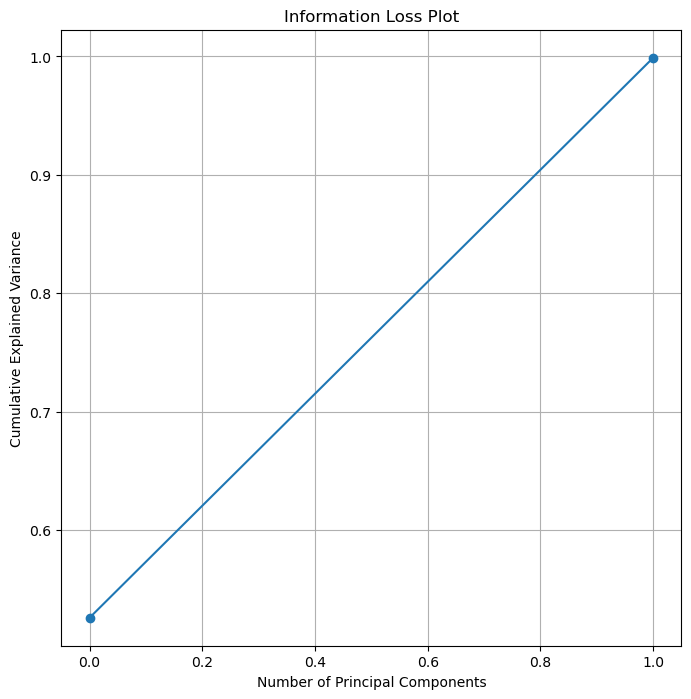

[0.52605174 0.99894894]


In [173]:
# Calculate cumulative explained variance
cumulative_var = np.cumsum(pca_reduction.explained_variance_ratio_)

# Plot information loss
plt.figure(figsize=(8, 8))
plt.plot(cumulative_var, marker='o')
plt.title('Information Loss Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
#print(cumulative_var)

# part B) Clustering with Kmeans

we try training a model with kmeans method to cluster our data. 

in this section we use random numbers for clusters. 

in part c we will check elbow curve for optimum number of clusters.

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [154]:
model_k_means = KMeans(init = "k-means++", n_clusters = 6, n_init = 12)

In [155]:
model_k_means.fit(x)
k_means_labels = model_k_means.labels_
k_means_labels

C:\Users\Predator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 3, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 3, 2, 2, 1, 1, 2, 1, 2, 1, 3,
       1, 3, 3, 2, 1, 1, 2, 3, 2, 1, 3, 1, 1, 3, 1, 3, 1, 2, 1, 3, 3, 1,
       1, 2, 3, 3, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3,
       1, 1, 1, 2, 1, 3, 3, 1, 1, 2, 3, 1, 3, 1, 2, 3, 1, 1, 3, 3, 1, 3,
       2, 3, 3, 3, 3, 2, 1, 2, 1, 3, 2, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3,
       4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 0, 0,
       5, 5, 0, 0, 5, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 5, 0, 0,
       5, 0, 2, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0,
       5, 0, 0, 5, 0, 2, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 5, 0, 0,
       5, 0])

now we validate our model with DB_score:

In [156]:
davies_bouldin_score(x, k_means_labels)

0.6705861740579873

so our DB_score is 0.67 which is almost good.(the less DB_score the better)

# Finding Cluster Centers for Plotting

In [157]:
k_means_cluster_centers = model_k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.17478289, -0.46101571, -0.46905543,  1.18022712],
       [-0.29293313,  0.01715601,  0.00389104, -0.29559058],
       [-0.10132693, -1.47362304, -1.45373807, -0.09396796],
       [-0.58614477,  1.25594731,  1.26835173, -0.59060348],
       [-1.75301317, -0.57402317, -0.57813914, -1.7610119 ],
       [ 1.14707901,  1.08561154,  1.09308572,  1.14907003]])

# Plotting clusters

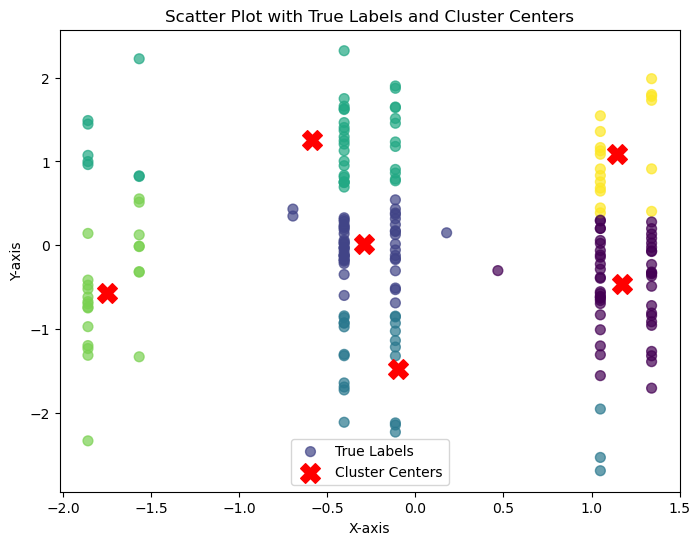

In [158]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=k_means_labels, cmap='viridis', marker='o', s=50, alpha=0.7, label='True Labels')

# Plot cluster centers
plt.scatter(k_means_cluster_centers[:, 0], k_means_cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# Set plot labels and title
plt.title('Scatter Plot with True Labels and Cluster Centers')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the legend
plt.legend()

# Display the plot
plt.show()

# part C) Elbow Curve

C:\Users\Predator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Predator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Predator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Predator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory le

Text(0, 0.5, 'wcss')

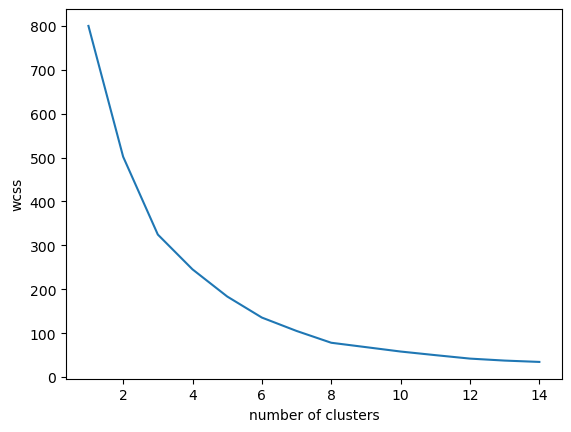

In [137]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

k_range = list(range(1,15))
sse = []
for k in k_range:
    temp_model = KMeans(init = "k-means++", n_clusters = k, n_init = 12).fit(x)
    sse.append(temp_model.inertia_)
plt.plot(k_range, sse)
plt.xlabel('number of clusters')
plt.ylabel('wcss')

so the optimum number of clusters based on elbow curve is 6.

# part D) Plotting Parallel Coordinates

now we will plot parallel_coordinates for our dataset and it's features with plotly library:

In [165]:
import plotly.express as px

# Plot parallel coordinates
fig = px.parallel_coordinates(engineered_df, color="std_month",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)

# Show the plot
fig.show()
# 'mean_month','std_month','var_month','total_month'

C:\Users\Predator\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



based on the plot above we can see that variance and standard deviation are so much alike and using one of them should be enough(it's logical right? their related by power 2). 
total consumption feature is important because we can see that lines are converged in 3 different points which may determine 3 clusters for us. 
mean feature is diverged from 6 points and lines which are diverged from these points are close together so they have positive correlation.


so we better use mean, total and variance for modelng.